# Traffic Sign Recognition using Deep Learning(CNN)

Traffic sign recognition using deep learning leverages Convolutional Neural Networks (CNNs) to classify traffic signs from images. CNNs automatically extract features from images and learn spatial hierarchies, making them highly effective for image classification tasks.

**Import libraries**

This script outlines a basic image classification workflow using Keras for deep learning. It includes data processing, model building, and model training.

In [8]:
import os
import cv2
import numpy as np
import pickle
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report

**Configuration Variables for Traffic Sign Recognition**

This section defines various configuration variables used for setting up and managing the traffic sign recognition project using deep learning.

In [2]:
path = "Dataset"               #This is the root folder containing all images and possibly subfolders.
labelFile = 'labels.csv'       #CSV file containing labels for the images in the dataset.
batch_size_val=32              #The number of images processed in each batch during model training.
epochs_val= 20                  #An epoch represents one complete pass over the entire dataset.
imageDimesions = (32,32,3)     #images will be resized to 32x32 pixels with 3 color channels (RGB).
testRatio = 0.2    
validationRatio = 0.2 

**Data Loading and Preparation**

This section of the code handles loading and preparing the dataset of traffic signs for further processing and model training.

In [3]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


**Data Splitting for Training, Testing, and Validation**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

**Displaying Random Images from the Dataset**

In this block of code, we are displaying a grid of 25 random images from the combined training and testing datasets.

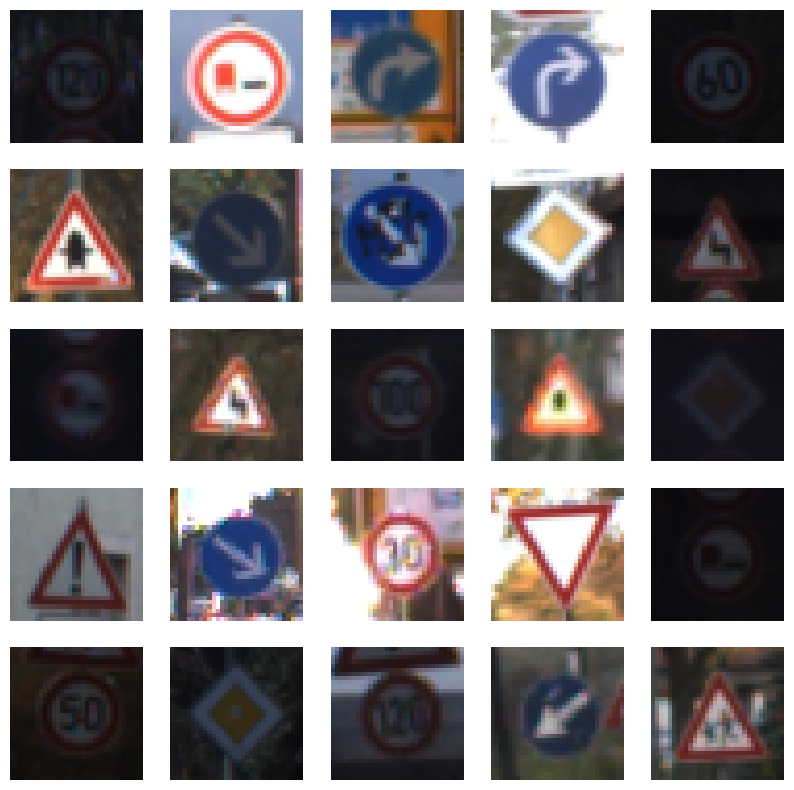

In [5]:
# Combine the X_train and X_test sets for displaying images
all_images = np.concatenate((X_train, X_test))

# Choose 25 random images
random_images = random.sample(range(all_images.shape[0]), 25)

# Display the random images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_images):
    image = all_images[idx]
    
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()

**Printing the Shapes of Train, Validation, and Test Data**

This block of code is used to display the shapes (dimensions) of the training, validation, and testing datasets for both features (images) and labels (class numbers). It helps ensure that the data has been split correctly into the respective sets.

In [6]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


**Data Preprocessing and Augmentation for Training, Validation, and Test Data**

Loading Label Data:

In [7]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


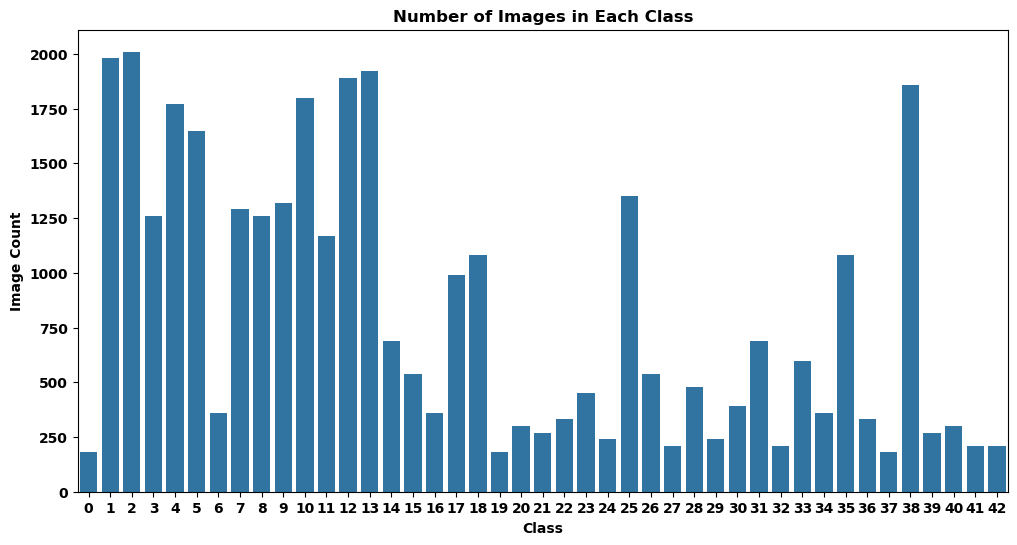

In [13]:
import os

# Path to the directory containing the class folders
dataset_dir = "Dataset"


# Initialize a dictionary to store the count of images for each class
class_image_count = {}

# Iterate over the class folders (assuming they are named from 0 to 42)
for class_name in range(43):  # Assuming class names are from 0 to 42
    class_dir = os.path.join(dataset_dir, str(class_name))
    if os.path.exists(class_dir) and os.path.isdir(class_dir):
        # Count the number of files (images) in the class directory
        num_images = len(os.listdir(class_dir))
        class_image_count[class_name] = num_images

# Create a DataFrame from the class_image_count dictionary
df = pd.DataFrame(list(class_image_count.items()), columns=['Class', 'Image Count'])

# Plotting the countplot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Class', y='Image Count')
plt.title('Number of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Image Count')
plt.show()

**Initializing Preprocessing Functions:**

In [16]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)      
    img = img/255            
    return img

**Preprocessing Training, Validation, and Test Sets:**

In [17]:
X_train=np.array(list(map(preprocessing,X_train)))  
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

**Reshaping the Data:**

In [18]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

**Data Augmentation:**

In [84]:
dataGen= ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)  

In [86]:
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)

**Converting Labels to Categorical Format:**

In [88]:
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

**CNN Model Creation:**

This code creates, compiles, trains, and evaluates a Convolutional Neural Network (CNN) model using TensorFlow/Keras. The model is designed for image classification, likely for tasks such as Traffic Sign Recognition, as suggested by the previous context. The code also includes visualizations of training progress and evaluation on the test set.

In [92]:
model= Sequential()
model.add((Conv2D(60,(5,5),input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
model.add((Conv2D(60, (5,5), activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add((Conv2D(30, (3,3),activation='relu')))
model.add((Conv2D(30, (3,3), activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
 
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(noOfClasses,activation='softmax')) 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=categorical_crossentropy, metrics=['accuracy'])


In [96]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 44)             │        22,044 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,524 (1.44 MB)

 Trainable params: 378,524 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


In [140]:
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=len(X_train)//32,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)

Epoch 1/20
  3/695 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9514 - loss: 0.1531

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


695/695 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.9267 - loss: 0.2472 - val_accuracy: 0.9858 - val_loss: 0.0506
Epoch 2/20
  1/695 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.7500 - loss: 0.7654

/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


695/695 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7500 - loss: 0.7654 - val_accuracy: 0.9899 - val_loss: 0.0366
Epoch 3/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.9248 - loss: 0.2445 - val_accuracy: 0.9887 - val_loss: 0.0408
Epoch 4/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8750 - loss: 0.2834 - val_accuracy: 0.9899 - val_loss: 0.0358
Epoch 5/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.9251 - loss: 0.2422 - val_accuracy: 0.9919 - val_loss: 0.0315
Epoch 6/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8438 - loss: 0.4425 - val_accuracy: 0.9919 - val_loss: 0.0313
Epoch 7/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.9271 - loss: 0.2340 - val_accuracy: 0.9740 - val_loss: 0.0789
Epoch 8/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8438 - loss: 0.4126 - val_accuracy: 0.9781 - val_loss: 0.0687
Epoch 9/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.9256 - loss: 0.2333 - val_accuracy: 0.993

**Training and Validation Loss/Accuracy Plotting:**

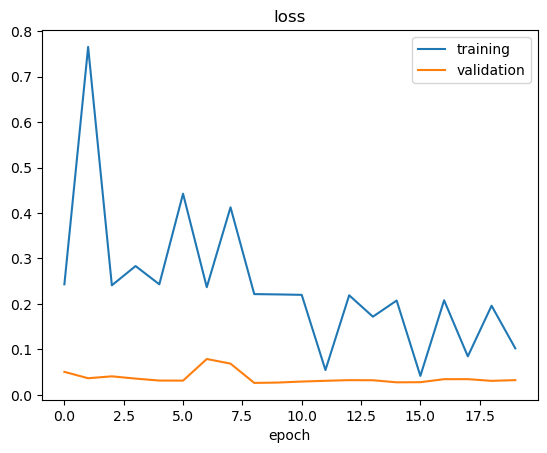

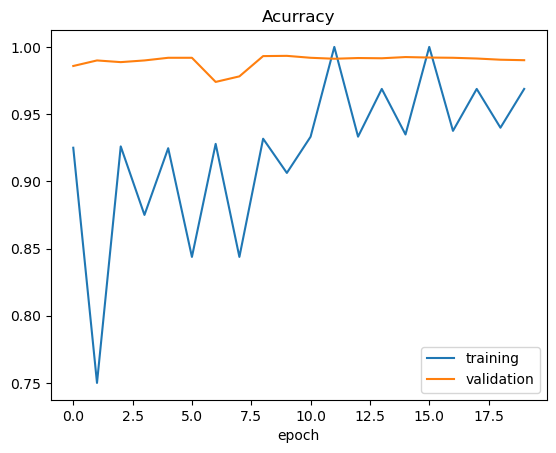

In [142]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

**Model Evaluation:**

In [144]:
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.030767563730478287
Test Accuracy: 0.9899425506591797


In [148]:
# Get the predicted labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate and print classification report
report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(report)

218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.99      0.99      0.99       392
           2       0.99      0.99      0.99       391
           3       1.00      0.96      0.98       226
           4       1.00      1.00      1.00       357
           5       0.98      0.97      0.98       320
           6       1.00      0.99      0.99        88
           7       0.95      1.00      0.97       253
           8       1.00      0.97      0.99       248
           9       0.98      1.00      0.99       240
          10       1.00      1.00      1.00       362
          11       1.00      1.00      1.00       219
          12       1.00      1.00      1.00       392
          13       1.00      1.00      1.00       390
          14       1.00      1.00      1.00       145
          15       1.00      0.99      1.00       117
          16    

**Model Saving:**

In [152]:
model.save("model.h5")

# Conclusion 
The CNN model achieved strong performance on the image classification task through effective preprocessing, data augmentation, and training. Future improvements could focus on fine-tuning the model or exploring deeper architectures for better accuracy.